In [2]:
from XRDXRFutils import SyntheticDataXRF
from matplotlib.pyplot import plot, show, subplots

### Read from outdata directory

In [3]:
datadir = '/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/outdata/'
synt = SyntheticDataXRF().read(datadir)

In [4]:
synt.shape

(1, 96, 2048)

In [6]:
synt.metadata

{'path': 'outdata',
 'labels': array(['Cu-KM', 'Sb-KN', 'Ar-KM', 'Si-KL', 'time', 'Sb-L2', 'Sb-L',
        'Si-KM', 'Ca-KL', 'Pb-M2', 'Si-K', 'Cu-L', 'Sb-KM', 'Pb-L',
        'Fe-KM', 'Sb-L3', 'Pb-L2', 'Pb-M1', 'Cu-L1', 'Cu-K', 'Sb-KL',
        'Pb-M4', 'Pb-M', 'Pb-M5', 'Pb-M3', 'Sb-KO', 'Ar-K', 'Sb-L1',
        'Ca-KM', 'Sb-K', 'Fe-KL', 'Ca-K', 'Ar-KL', 'Fe-K', 'Pb-L3', 'S-KM',
        'Cu-KL', 'S-KL', 'Pb-L1', 'S-K'], dtype=object),
 'elements': array(['Ar', 'Sb', 'Pb', 'N', 'Ca', 'O', 'Fe', 'C', 'Cu', 'H', 'Si', 'S'],
       dtype=object),
 'layers': array(['air_top', 'pictorial', 'quartz'], dtype=object)}

In [7]:
synt.layers_names

['air_top', 'pictorial', 'quartz']

In [9]:
print(synt.spectra[0].layers) ### a single spectra (SyntheticSpectraXRF) see read_synthetic_spectra.ipynb

Layers
├── air_top density = 0.001205 thickness = 16645.3 μm
│   ├── C  0.0124
│   ├── N  75.5268
│   ├── O  23.1781
│   └── Ar  1.2827
├── pictorial density = 4.07118 thickness = 74.0371 μm
│   ├── H  0.040294
│   ├── C  1.62168
│   ├── O  37.2402
│   ├── Si  17.0732
│   ├── S  0.153816
│   ├── Ca  3.9241
│   ├── Fe  26.7564
│   ├── Cu  0.182354
│   ├── Sb  0.584083
│   └── Pb  12.424
└── quartz density = 2.648 thickness = 500.0 μm
    ├── O  53.2554
    └── Si  46.7446
Layers
├── air_top
│   ├── pigments  None
│   ├── volume_fractions  None
│   └── mass_fractions  None
├── pictorial
│   ├── pigments  ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue', 'antimony_orange']
│   ├── volume_fractions  [0.550943468492568, 0.0870710574729104, 0.19789190952087793, 0.14290239422598888, 0.014260587969035952, 0.006930582318618753]
│   └── mass_fractions  [0.3583475681310475, 0.1454327357127815, 0.38254472124649835, 0.095123591231562, 0.010788662080618294, 0.007762721597492263]
└── 

### Read from a list of files
##### A big dataset can be splitted limiting memory usage.

In [10]:
from glob import glob

In [11]:
xmsolist = glob('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/outdata/*.xmso')

In [12]:
len(xmsolist)

96

In [13]:
synt = SyntheticDataXRF().read(xmsolist)

In [14]:
synt.shape

(1, 96, 2048)

In [15]:
xmsolist01 = xmsolist[:50]
xmsolist02 = xmsolist[50:]

In [16]:
synt01 = SyntheticDataXRF().read(xmsolist01)
synt02 = SyntheticDataXRF().read(xmsolist02)

In [17]:
synt01.shape, synt02.shape

((1, 50, 2048), (1, 46, 2048))

### Convoluted and Uncovoluted spectra

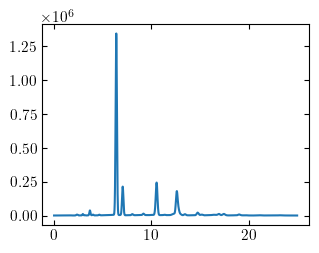

In [19]:
plot(synt.x,synt.data[0,0,:])

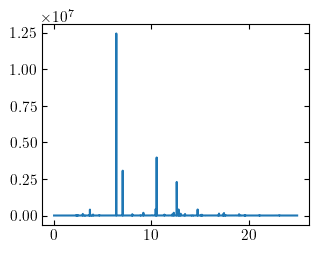

In [20]:
plot(synt.x, synt.unconv_data[0,0,:])

### Labels

In [24]:
print(synt.metadata['labels'], len(synt.metadata['labels']))

['Cu-KM' 'Sb-KN' 'Ar-KM' 'Si-KL' 'time' 'Sb-L2' 'Sb-L' 'Si-KM' 'Ca-KL'
 'Pb-M2' 'Si-K' 'Cu-L' 'Sb-KM' 'Pb-L' 'Fe-KM' 'Sb-L3' 'Pb-L2' 'Pb-M1'
 'Cu-L1' 'Cu-K' 'Sb-KL' 'Pb-M4' 'Pb-M' 'Pb-M5' 'Pb-M3' 'Sb-KO' 'Ar-K'
 'Sb-L1' 'Ca-KM' 'Sb-K' 'Fe-KL' 'Ca-K' 'Ar-KL' 'Fe-K' 'Pb-L3' 'S-KM'
 'Cu-KL' 'S-KL' 'Pb-L1' 'S-K'] 40


In [22]:
synt.labels.shape

(1, 96, 40)

### Layers

In [25]:
synt.layers_names

['air_top', 'pictorial', 'quartz']

#### thickness

In [32]:
# thickness for each layer
print(synt._get_thickness().shape)
synt._get_thickness()

(96, 3)


array([[1.66453e+00, 7.40371e-03, 5.00000e-02],
       [1.54587e+00, 8.13497e-03, 5.00000e-02],
       [1.56026e+00, 8.34981e-03, 5.00000e-02],
       [1.36527e+00, 6.77771e-03, 5.00000e-02],
       [1.56988e+00, 8.46021e-03, 5.00000e-02],
       [1.82538e+00, 4.08426e-03, 5.00000e-02],
       [1.62775e+00, 8.63725e-03, 5.00000e-02],
       [1.52955e+00, 7.65809e-03, 5.00000e-02],
       [1.89225e+00, 4.22274e-03, 5.00000e-02],
       [1.21619e+00, 8.58172e-03, 5.00000e-02],
       [1.51996e+00, 8.30499e-03, 5.00000e-02],
       [1.85148e+00, 7.55627e-03, 5.00000e-02],
       [1.89341e+00, 4.44945e-03, 5.00000e-02],
       [2.47090e+00, 4.03441e-03, 5.00000e-02],
       [1.60441e+00, 8.79799e-03, 5.00000e-02],
       [2.16015e+00, 6.93553e-03, 5.00000e-02],
       [1.92346e+00, 7.86860e-03, 5.00000e-02],
       [1.27153e+00, 8.08688e-03, 5.00000e-02],
       [1.98590e+00, 1.57791e-03, 5.00000e-02],
       [1.12494e+00, 2.41812e-03, 5.00000e-02],
       [1.61060e+00, 9.23790e-03, 5.0000

#### elements and weight fractions

In [40]:
# in metadata we find the set of all the elements in the wole dataset
# weight fractions are ordered as the follow array
print(synt.metadata['elements'], len(synt.metadata['elements']))

['Ar' 'Sb' 'Pb' 'N' 'Ca' 'O' 'Fe' 'C' 'Cu' 'H' 'Si' 'S'] 12


In [36]:
# use the layer name as argument
print(synt._get_wfrac('pictorial').shape)
synt._get_wfrac('pictorial')

(96, 12)


array([[0.00000e+00, 5.84083e-01, 1.24240e+01, ..., 4.02940e-02,
        1.70732e+01, 1.53816e-01],
       [0.00000e+00, 1.08001e+00, 5.12894e+00, ..., 1.66344e-02,
        3.19662e+01, 2.84415e-01],
       [0.00000e+00, 7.11460e-01, 1.59566e+01, ..., 5.17512e-02,
        2.61533e+01, 1.87360e-01],
       ...,
       [0.00000e+00, 5.07159e-01, 1.28341e+01, ..., 4.16242e-02,
        3.38969e+01, 1.33558e-01],
       [0.00000e+00, 7.73475e-01, 2.07302e+01, ..., 6.72330e-02,
        2.60653e+01, 2.03692e-01],
       [0.00000e+00, 4.97835e-01, 2.73278e+01, ..., 8.86308e-02,
        2.44809e+01, 1.31103e-01]])

In [42]:
# the air layer
print(synt._get_wfrac('air_top').shape)
synt._get_wfrac('air_top')

(96, 12)


array([[1.2827, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.2827, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.2827, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [1.2827, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.2827, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.2827, 0.    , 0.    , ..., 0.    , 0.    , 0.    ]])

### Pigments if present

In [45]:
synt._get_pigments('pictorial').astype('U20')

array([['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',
        'antimony_o'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_b',


In [46]:
print(synt._get_pigments('air_top'))

[b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None' b'None'
 b'None' b'None' b'None' b'None' b'None' b'None']


### Save h5
#### save_h5() method saves only data and labels for now

In [47]:
synt.save_h5('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/All_data.h5')

Saving: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/All_data.h5


In [48]:
synt01.save_h5('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Part01_data.h5')

Saving: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Part01_data.h5


In [49]:
synt02.save_h5('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Part02_data.h5')

Saving: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Part02_data.h5


### Save layers

#### The method save_layers() will save all layers in a tree data structure

In [50]:
synt.save_layers('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5')

Saving: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5


In [52]:
from os import system

In [53]:
system('h5tree /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5')

/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5
└── layers
    ├── air_top
    │   ├── thickness
    │   └── weight_fractions
    ├── pictorial
    │   ├── thickness
    │   └── weight_fractions
    └── quartz
        ├── thickness
        └── weight_fractions


0

### Load data and labels

In [54]:
synt = SyntheticDataXRF().load_h5('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/All_data.h5')

Loading: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/All_data.h5


In [55]:
synt.data.shape, synt.labels.shape

((1, 96, 2048), (1, 96, 40))

In [56]:
synt.metadata

{'elements': array(['Ar', 'Sb', 'Pb', 'N', 'Ca', 'O', 'Fe', 'C', 'Cu', 'H', 'Si', 'S'],
       dtype=object),
 'labels': array(['Cu-KM', 'Sb-KN', 'Ar-KM', 'Si-KL', 'time', 'Sb-L2', 'Sb-L',
        'Si-KM', 'Ca-KL', 'Pb-M2', 'Si-K', 'Cu-L', 'Sb-KM', 'Pb-L',
        'Fe-KM', 'Sb-L3', 'Pb-L2', 'Pb-M1', 'Cu-L1', 'Cu-K', 'Sb-KL',
        'Pb-M4', 'Pb-M', 'Pb-M5', 'Pb-M3', 'Sb-KO', 'Ar-K', 'Sb-L1',
        'Ca-KM', 'Sb-K', 'Fe-KL', 'Ca-K', 'Ar-KL', 'Fe-K', 'Pb-L3', 'S-KM',
        'Cu-KL', 'S-KL', 'Pb-L1', 'S-K'], dtype=object),
 'layers': array(['air_top', 'pictorial', 'quartz'], dtype=object)}

### Load layers

In [57]:
synt.load_layers('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5')

Loading: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5


In [58]:
type(synt.layers)

dict

In [63]:
for kk,vv in synt.layers.items():
    if isinstance(vv, dict):
        print(kk, vv.keys())
        for k, v in vv.items():
            print('  ',k,v.shape)

air_top dict_keys(['thickness', 'weight_fractions', 'elements'])
   thickness (96,)
   weight_fractions (96, 4)
   elements (96, 4)
pictorial dict_keys(['thickness', 'weight_fractions', 'elements'])
   thickness (96,)
   weight_fractions (96, 10)
   elements (96, 10)
quartz dict_keys(['thickness', 'weight_fractions', 'elements'])
   thickness (96,)
   weight_fractions (96, 2)
   elements (96, 2)


#### thickness

In [64]:
synt._get_thickness()

array([[1.66453e+00, 7.40371e-03, 5.00000e-02],
       [1.54587e+00, 8.13497e-03, 5.00000e-02],
       [1.56026e+00, 8.34981e-03, 5.00000e-02],
       [1.36527e+00, 6.77771e-03, 5.00000e-02],
       [1.56988e+00, 8.46021e-03, 5.00000e-02],
       [1.82538e+00, 4.08426e-03, 5.00000e-02],
       [1.62775e+00, 8.63725e-03, 5.00000e-02],
       [1.52955e+00, 7.65809e-03, 5.00000e-02],
       [1.89225e+00, 4.22274e-03, 5.00000e-02],
       [1.21619e+00, 8.58172e-03, 5.00000e-02],
       [1.51996e+00, 8.30499e-03, 5.00000e-02],
       [1.85148e+00, 7.55627e-03, 5.00000e-02],
       [1.89341e+00, 4.44945e-03, 5.00000e-02],
       [2.47090e+00, 4.03441e-03, 5.00000e-02],
       [1.60441e+00, 8.79799e-03, 5.00000e-02],
       [2.16015e+00, 6.93553e-03, 5.00000e-02],
       [1.92346e+00, 7.86860e-03, 5.00000e-02],
       [1.27153e+00, 8.08688e-03, 5.00000e-02],
       [1.98590e+00, 1.57791e-03, 5.00000e-02],
       [1.12494e+00, 2.41812e-03, 5.00000e-02],
       [1.61060e+00, 9.23790e-03, 5.0000

#### elements and weight fractions

In [65]:
print(synt.metadata['elements'], len(synt.metadata['elements']))

['Ar' 'Sb' 'Pb' 'N' 'Ca' 'O' 'Fe' 'C' 'Cu' 'H' 'Si' 'S'] 12


In [67]:
print(synt._get_wfrac('pictorial').shape)
synt._get_wfrac('pictorial')

(96, 12)


array([[0.00000e+00, 5.84083e-01, 1.24240e+01, ..., 4.02940e-02,
        1.70732e+01, 1.53816e-01],
       [0.00000e+00, 1.08001e+00, 5.12894e+00, ..., 1.66344e-02,
        3.19662e+01, 2.84415e-01],
       [0.00000e+00, 7.11460e-01, 1.59566e+01, ..., 5.17512e-02,
        2.61533e+01, 1.87360e-01],
       ...,
       [0.00000e+00, 5.07159e-01, 1.28341e+01, ..., 4.16242e-02,
        3.38969e+01, 1.33558e-01],
       [0.00000e+00, 7.73475e-01, 2.07302e+01, ..., 6.72330e-02,
        2.60653e+01, 2.03692e-01],
       [0.00000e+00, 4.97835e-01, 2.73278e+01, ..., 8.86308e-02,
        2.44809e+01, 1.31103e-01]])

In [68]:
### to be implemented
synt._get_pigments('pictorial')

KeyError: 'pigments'